In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import os

# Configuración de matplotlib para mejores gráficas
plt.style.use('seaborn-v0_8-darkgrid')
%matplotlib inline

## 1. Cargar datos de un archivo

In [5]:
def cargar_señal(archivo):
    """
    Carga un archivo CSV de señal
    Retorna un DataFrame con los datos
    """
    # Leer el CSV, saltando las primeras 2 filas (Frequency y Unit)
    df = pd.read_csv(archivo, skiprows=2, header=None, names=['Voltaje_mV'])
    # Crear índice de tiempo (asumiendo muestras consecutivas)
    df['Muestra'] = range(len(df))
    return df

# Probar con el primer archivo
señal_1 = cargar_señal('Señal/001.csv')
print(f"Número de muestras: {len(señal_1)}")
print(f"\nPrimeras filas:")
señal_1.head(50)

Número de muestras: 20004

Primeras filas:


,Voltaje_mV,Muestra
0,CH1,0
1,-8.43,1
2,-8.64,2
3,-5.82,3
4,-1.02,4
5,4.60,5
6,10.03,6
7,14.52,7
8,17.71,8
9,19.56,9


## 2. Visualizar una señal individual

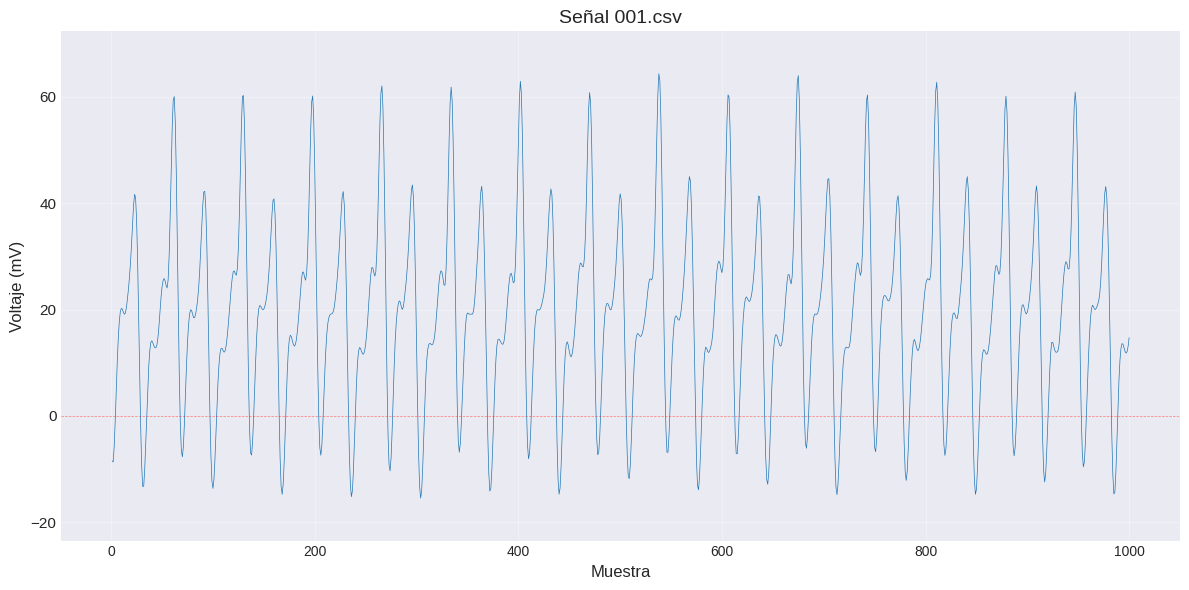

In [7]:
def graficar_señal(df, titulo='Señal', max_muestra=None):
    """
    Grafica una señal
    """
    # Filtrar datos si se especifica un máximo de muestras
    if max_muestra is not None:
        df_plot = df[df['Muestra'] <= max_muestra]
    else:
        df_plot = df
    
    # Convertir a numérico para evitar problemas
    df_plot = df_plot.copy()
    df_plot['Voltaje_mV'] = pd.to_numeric(df_plot['Voltaje_mV'], errors='coerce')
    
    plt.figure(figsize=(12, 6))
    plt.plot(df_plot['Muestra'], df_plot['Voltaje_mV'], linewidth=0.5)
    plt.xlabel('Muestra', fontsize=12)
    plt.ylabel('Voltaje (mV)', fontsize=12)
    plt.title(titulo, fontsize=14)
    plt.grid(True, alpha=0.3)
    
    # Añadir línea en y=0 para referencia
    plt.axhline(y=0, color='r', linestyle='--', linewidth=0.5, alpha=0.5)
    
    # Mejorar la visibilidad del eje y
    plt.ticklabel_format(style='plain', axis='y')
    plt.yticks(fontsize=11)
    
    # Ajustar márgenes para ver mejor los valores
    plt.margins(y=0.1)
    
    plt.tight_layout()
    plt.show()

# Graficar la primera señal hasta la muestra 1000
graficar_señal(señal_1, 'Señal 001.csv', max_muestra=1000)

## 3. Visualizar múltiples señales

In [8]:
# Obtener lista de todos los archivos CSV en la carpeta Señal
carpeta_señal = Path('Señal')
archivos_csv = sorted(carpeta_señal.glob('*.csv'))
print(f"Total de archivos encontrados: {len(archivos_csv)}")
print(f"Primeros 10 archivos: {[f.name for f in archivos_csv[:10]]}")

Total de archivos encontrados: 59
Primeros 10 archivos: ['001.csv', '002.csv', '003.csv', '004.csv', '005.csv', '006.csv', '007.csv', '008.csv', '009.csv', '010.csv']


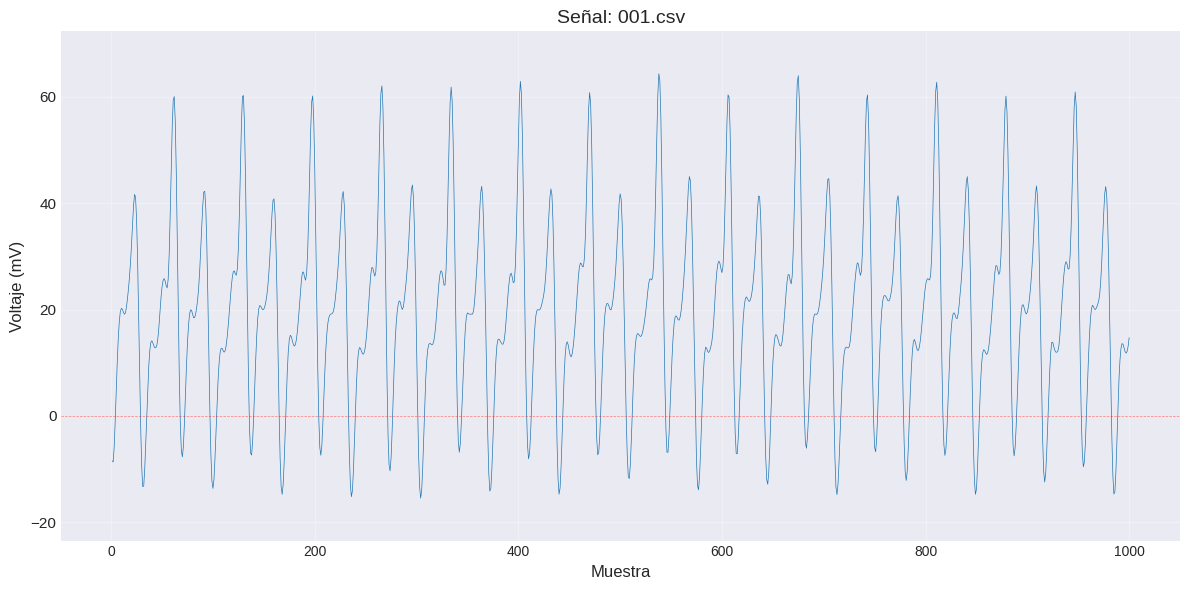

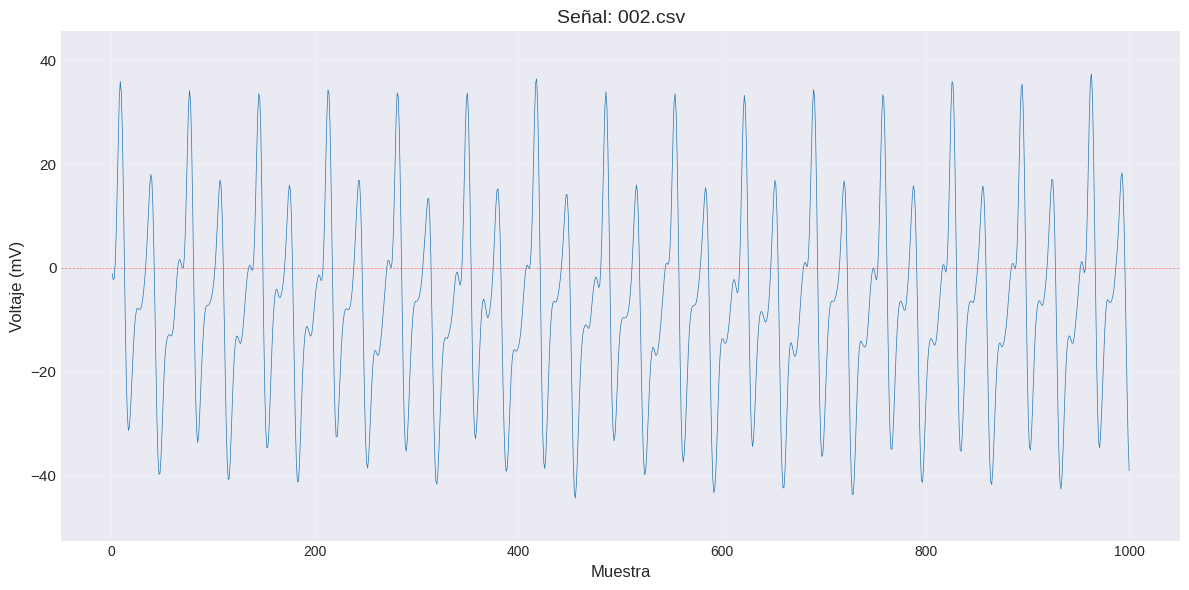

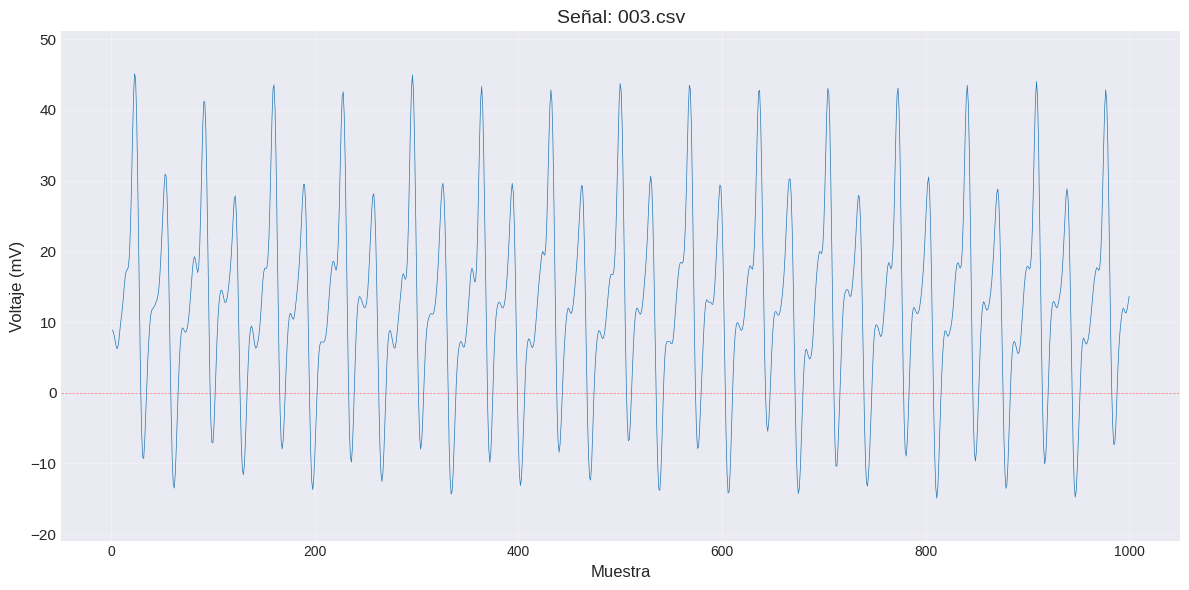

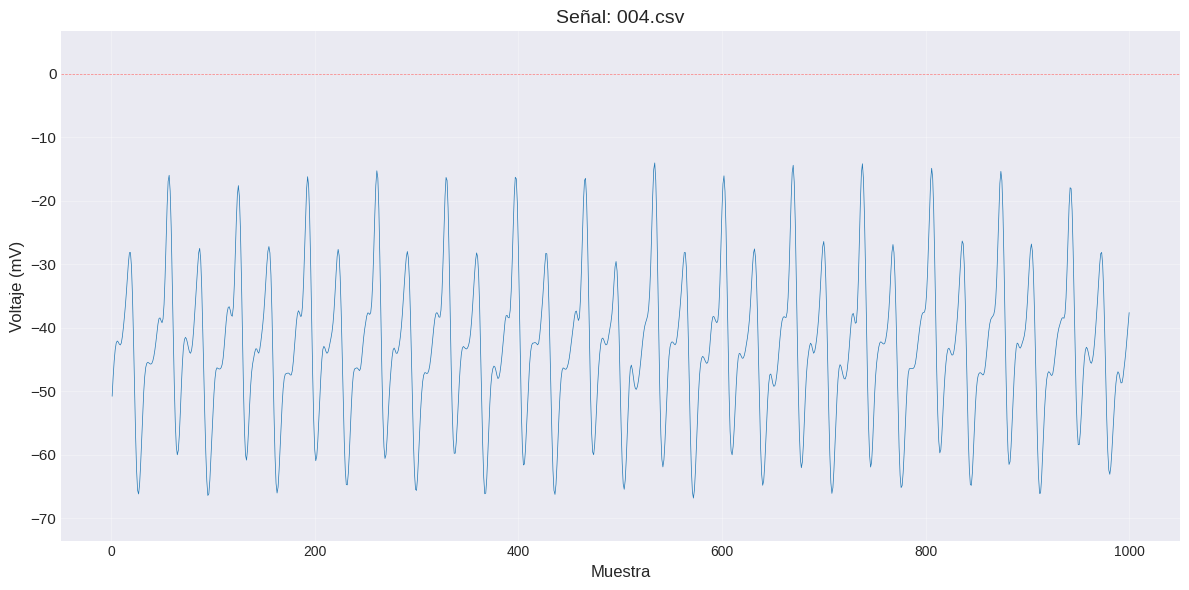

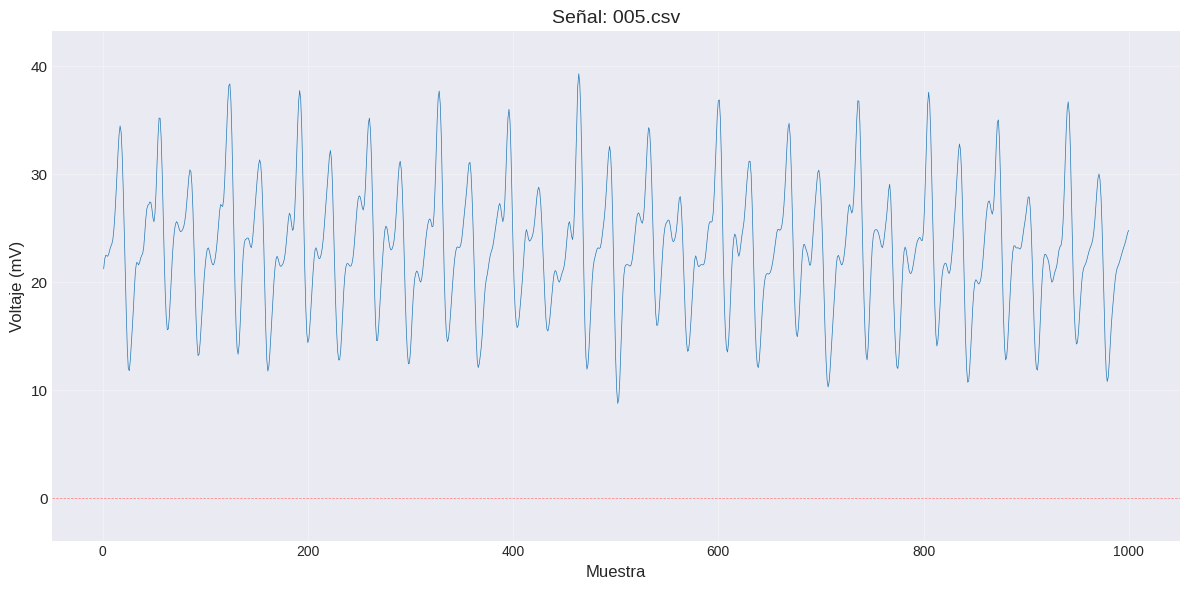

In [10]:
def graficar_multiples_señales(archivos, num_señales=5, inicio=0):
    """
    Grafica múltiples señales una a una usando la función graficar_señal
    
    Args:
        archivos: lista de archivos a graficar
        num_señales: número de señales a graficar
        inicio: índice de inicio para seleccionar archivos
    """
    archivos_seleccionados = archivos[inicio:inicio + num_señales]
    
    for archivo in archivos_seleccionados:
        df = cargar_señal(archivo)
        graficar_señal(df, f'Señal: {archivo.name}', max_muestra=1000)

# Graficar las primeras 5 señales (solo primeras 1000 muestras)
graficar_multiples_señales(archivos_csv, num_señales=5, inicio=0)


## 4. Guardar señales

In [11]:
def guardar_todas_las_señales(archivos, carpeta_destino='Graficas_Señales'):
    """
    Guarda gráficas de todas las señales en una carpeta
    
    Args:
        archivos: lista de archivos a graficar
        carpeta_destino: nombre de la carpeta donde guardar las gráficas
    """
    # Crear carpeta si no existe
    Path(carpeta_destino).mkdir(exist_ok=True)
    
    print(f"Generando {len(archivos)} gráficas...")
    
    for i, archivo in enumerate(archivos, 1):
        # Cargar señal
        df = cargar_señal(archivo)
        
        # Convertir a numérico para evitar problemas
        df['Voltaje_mV'] = pd.to_numeric(df['Voltaje_mV'], errors='coerce')
        
        # Crear figura
        plt.figure(figsize=(12, 6))
        plt.plot(df['Muestra'][:1000], df['Voltaje_mV'][:1000], linewidth=0.5)
        plt.xlabel('Muestra', fontsize=12)
        plt.ylabel('Voltaje (mV)', fontsize=12)
        plt.title(f'Señal: {archivo.name}', fontsize=14)
        plt.grid(True, alpha=0.3)
        plt.axhline(y=0, color='r', linestyle='--', linewidth=0.5, alpha=0.5)
        plt.tight_layout()
        
        # Guardar figura
        nombre_salida = f"{carpeta_destino}/{archivo.stem}.png"
        plt.savefig(nombre_salida, dpi=150, bbox_inches='tight')
        plt.close()
        
        # Mostrar progreso
        if i % 10 == 0:
            print(f"  Procesadas {i}/{len(archivos)} señales...")
    
    print(f"\n¡Completado! Todas las gráficas guardadas en '{carpeta_destino}/'")

# Guardar todas las señales
guardar_todas_las_señales(archivos_csv)

Generando 59 gráficas...
  Procesadas 10/59 señales...
  Procesadas 20/59 señales...
  Procesadas 30/59 señales...
  Procesadas 40/59 señales...
  Procesadas 50/59 señales...

¡Completado! Todas las gráficas guardadas en 'Graficas_Señales/'


## 5. Estadísticas de las señales

In [14]:
def analizar_señal(archivo):
    """
    Calcula estadísticas básicas de una señal
    """
    df = cargar_señal(archivo)
    # Convertir a numérico, forzando errores a NaN
    voltaje = pd.to_numeric(df['Voltaje_mV'], errors='coerce')
    # Eliminar NaN
    voltaje = voltaje.dropna()
    
    stats = {
        'Archivo': archivo.name,
        'Muestras': len(voltaje),
        'Media (mV)': voltaje.mean(),
        'Desv. Std (mV)': voltaje.std(),
        'Mínimo (mV)': voltaje.min(),
        'Máximo (mV)': voltaje.max(),
        'Pico-Pico (mV)': voltaje.max() - voltaje.min()
    }
    return stats

# Analizar las primeras 10 señales
estadisticas = [analizar_señal(archivo) for archivo in archivos_csv[:59]]
df_stats = pd.DataFrame(estadisticas)
df_stats

,Archivo,Muestras,Media (mV),Desv. Std (mV),Mínimo (mV),Máximo (mV),Pico-Pico (mV)
0,001.csv,20000,12.141869,17.442252,-64.00,80.00,144.00
1,002.csv,20000,-4.398177,13.492208,-160.00,160.00,320.00
2,003.csv,20000,6.214968,11.284098,-20.00,160.00,180.00
3,004.csv,20000,-21.504926,23.004984,-69.30,-0.01,69.29
4,005.csv,20000,11.974244,12.764069,0.02,43.03,43.01
5,006.csv,20000,25.234137,25.524993,0.01,66.83,66.82
6,007.csv,20000,13.502068,13.900169,0.02,43.20,43.18
7,008.csv,20000,46.063477,46.097640,0.01,100.20,100.19
8,009.csv,20000,-0.526722,10.170929,-320.00,320.00,640.00
9,010.csv,20000,0.811643,6.518349,-320.00,320.00,640.00


## 6. Visualización interactiva - Seleccionar archivo

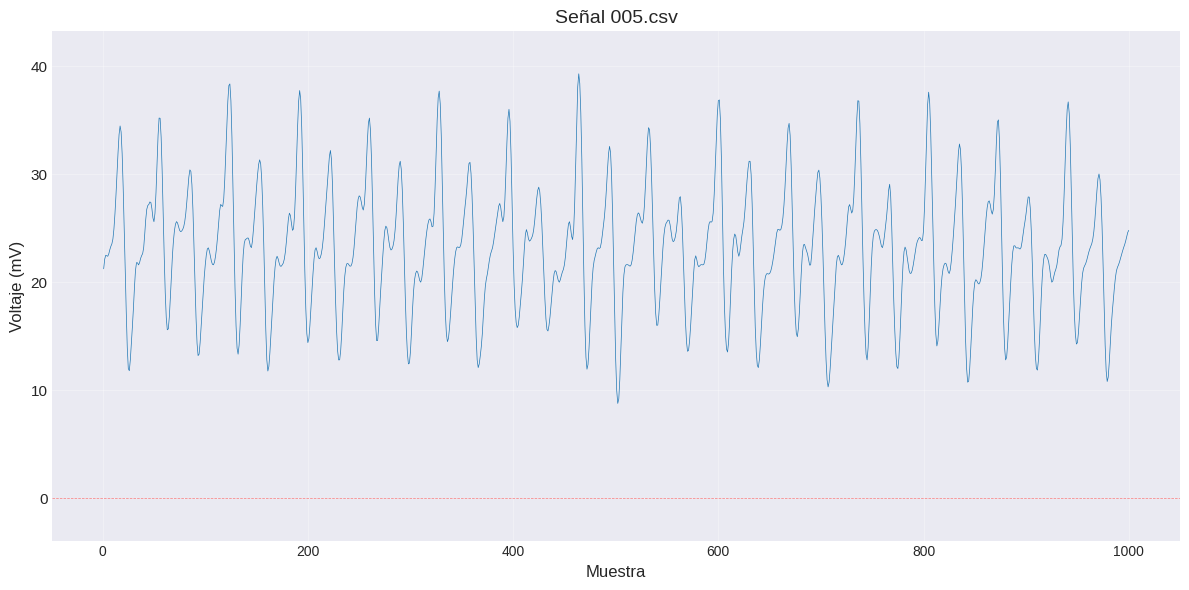


Estadísticas de 005.csv:
Número de muestras: 20000
Media: 11.97 mV
Desviación estándar: 12.76 mV
Rango: [0.02, 43.03] mV


In [17]:
# Selector manual de archivo
def visualizar_archivo_por_numero(numero):
    """
    Visualiza un archivo específico por su número
    """
    archivo_path = f'Señal/{numero:03d}.csv'
    if os.path.exists(archivo_path):
        df = cargar_señal(archivo_path)
        graficar_señal(df, f'Señal {numero:03d}.csv', max_muestra=1000)
        
        # Convertir a numérico para estadísticas
        voltaje = pd.to_numeric(df['Voltaje_mV'], errors='coerce').dropna()
        
        # Mostrar estadísticas
        print(f"\nEstadísticas de {numero:03d}.csv:")
        print(f"Número de muestras: {len(voltaje)}")
        print(f"Media: {voltaje.mean():.2f} mV")
        print(f"Desviación estándar: {voltaje.std():.2f} mV")
        print(f"Rango: [{voltaje.min():.2f}, {voltaje.max():.2f}] mV")
    else:
        print(f"Archivo {archivo_path} no encontrado")

# Ejemplo: Visualizar archivo número 5
visualizar_archivo_por_numero(5)